In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Diemthi_thpt_quocgia_2016.csv')
print(df.shape)

(34826, 6)


In [3]:
print(df.head())

  SOBAODANH         HO_TEN   NGAY_SINH         TEN_CUMTHI GIOI_TINH  \
0  18000001  DƯƠNG VIỆT AN  12/03/1998  Sở GDĐT Bắc Giang       Nam   
1  18000002      ĐỖ VĂN AN   9/12/1998  Sở GDĐT Bắc Giang       Nam   
2  18000003     ĐỖ XUÂN AN  12/08/1997  Sở GDĐT Bắc Giang       Nam   
3  18000004   ĐẶNG PHÚC AN  19/03/1998  Sở GDĐT Bắc Giang        Nữ   
4  18000005    ĐẶNG VĂN AN  25/10/1998  Sở GDĐT Bắc Giang       Nam   

                                            DIEM_THI  
0  Toán:   2.00   Ngữ văn:   5.50   Lịch sử:   3....  
1  Toán:   5.50   Ngữ văn:   5.25   Địa lí:   5.5...  
2  Toán:   4.50   Ngữ văn:   5.50   Địa lí:   3.7...  
3  Toán:   3.00   Ngữ văn:   6.00   Địa lí:   5.5...  
4  Toán:   2.25   Ngữ văn:   4.75   Địa lí:   5.2...  


In [10]:
# doc diem thi cua thi sinh dau tien
chuoi = df.iloc[0]['DIEM_THI']
print(chuoi)

Toán:   2.00   Ngữ văn:   5.50   Lịch sử:   3.00   Địa lí:   5.00


In [11]:
chuoi = chuoi.split(' '*2)
print(chuoi)

['Toán:', ' 2.00', ' Ngữ văn:', ' 5.50', ' Lịch sử:', ' 3.00', ' Địa lí:', ' 5.00']


In [13]:
mon = []
diem = []
for i in range(0,len(chuoi),2):
    mon.append(chuoi[i].strip(':').strip())
    diem.append(float(chuoi[i+1]))
df_ = pd.DataFrame({'mon':mon,'diem':diem})    
print(df_)

       mon  diem
0     Toán   2.0
1  Ngữ văn   5.5
2  Lịch sử   3.0
3   Địa lí   5.0


In [14]:
def tach_diem(chuoi):
    chuoi = chuoi.split(' '*2)    
    mon = []
    diem = []
    for i in range(0,len(chuoi),2):
        mon.append(chuoi[i].strip(':').strip())
        diem.append(float(chuoi[i+1]))
    return pd.DataFrame({'mon':mon, 'diem':diem})

In [15]:
chuoi = df.iloc[0]['DIEM_THI']
print(tach_diem(chuoi))

       mon  diem
0     Toán   2.0
1  Ngữ văn   5.5
2  Lịch sử   3.0
3   Địa lí   5.0


In [16]:
chuoi = df.iloc[1]['DIEM_THI']
print(chuoi)
print(tach_diem(chuoi))

Toán:   5.50   Ngữ văn:   5.25   Địa lí:   5.50   Tiếng Anh:   3.68
         mon  diem
0       Toán  5.50
1    Ngữ văn  5.25
2     Địa lí  5.50
3  Tiếng Anh  3.68


In [17]:
# ap dung cho tat ca thi sinh
l_sobaodanh = []
l_mon = []
l_diem = []

In [18]:
for i in range(df.shape[0]):
    df_diem = tach_diem(df.iloc[i]['DIEM_THI'])
    for j in range(df_diem.shape[0]):
        l_sobaodanh.append(df.iloc[i]['SOBAODANH'])
        l_mon.append(df_diem.iloc[j]['mon'])
        l_diem.append(df_diem.iloc[j]['diem'])

In [19]:
df_diem = pd.DataFrame({'sobaodanh':l_sobaodanh, 'mon':l_mon, 'diem':l_diem })

In [20]:
df_diem.shape

(145874, 3)

In [21]:
df_diem.head()

,sobaodanh,mon,diem
0,18000001,Toán,2.0
1,18000001,Ngữ văn,5.5
2,18000001,Lịch sử,3.0
3,18000001,Địa lí,5.0
4,18000002,Toán,5.5


In [22]:
# cho biet so bao danh co diem Toan lon nhat
diem_max = df_diem[df_diem['mon']=='Toán'].diem.max()

In [23]:
diem_max

9.75

In [24]:
df_diem[(df_diem['mon']=='Toán') & (df_diem['diem']==diem_max)]

,sobaodanh,mon,diem
97584,HUI003709,Toán,9.75


In [25]:
df_diem_ = df_diem.pivot(index='sobaodanh', columns='mon', values='diem')

In [26]:
df_diem_.head()

mon,Hóa học,Lịch sử,Ngữ văn,Sinh học,Tiếng Anh,Tiếng Nhật,Tiếng Pháp,Tiếng Trung,Tiếng Đức,Toán,Vật lí,Địa lí
sobaodanh,,,,,,,,,,,,
18000001,NaN,3.0,5.50,NaN,NaN,NaN,NaN,NaN,NaN,2.00,NaN,5.00
18000002,NaN,NaN,5.25,NaN,3.68,NaN,NaN,NaN,NaN,5.50,NaN,5.50
18000003,NaN,NaN,5.50,NaN,2.25,NaN,NaN,NaN,NaN,4.50,NaN,3.75
18000004,NaN,NaN,6.00,NaN,1.50,NaN,NaN,NaN,NaN,3.00,NaN,5.50
18000005,NaN,NaN,4.75,NaN,2.00,NaN,NaN,NaN,NaN,2.25,NaN,5.25


In [27]:
df_ = pd.merge(df, df_diem_, left_on='SOBAODANH', right_on=df_diem_.index)

In [28]:
df_.head()

,SOBAODANH,HO_TEN,NGAY_SINH,TEN_CUMTHI,GIOI_TINH,DIEM_THI,Hóa học,Lịch sử,Ngữ văn,Sinh học,Tiếng Anh,Tiếng Nhật,Tiếng Pháp,Tiếng Trung,Tiếng Đức,Toán,Vật lí,Địa lí
0,18000001,DƯƠNG VIỆT AN,12/03/1998,Sở GDĐT Bắc Giang,Nam,Toán: 2.00 Ngữ văn: 5.50 Lịch sử: 3....,NaN,3.0,5.50,NaN,NaN,NaN,NaN,NaN,NaN,2.00,NaN,5.00
1,18000002,ĐỖ VĂN AN,9/12/1998,Sở GDĐT Bắc Giang,Nam,Toán: 5.50 Ngữ văn: 5.25 Địa lí: 5.5...,NaN,NaN,5.25,NaN,3.68,NaN,NaN,NaN,NaN,5.50,NaN,5.50
2,18000003,ĐỖ XUÂN AN,12/08/1997,Sở GDĐT Bắc Giang,Nam,Toán: 4.50 Ngữ văn: 5.50 Địa lí: 3.7...,NaN,NaN,5.50,NaN,2.25,NaN,NaN,NaN,NaN,4.50,NaN,3.75
3,18000004,ĐẶNG PHÚC AN,19/03/1998,Sở GDĐT Bắc Giang,Nữ,Toán: 3.00 Ngữ văn: 6.00 Địa lí: 5.5...,NaN,NaN,6.00,NaN,1.50,NaN,NaN,NaN,NaN,3.00,NaN,5.50
4,18000005,ĐẶNG VĂN AN,25/10/1998,Sở GDĐT Bắc Giang,Nam,Toán: 2.25 Ngữ văn: 4.75 Địa lí: 5.2...,NaN,NaN,4.75,NaN,2.00,NaN,NaN,NaN,NaN,2.25,NaN,5.25


c:\program files\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
c:\program files\python36\lib\site-packages\numpy\core\_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)
c:\program files\python36\lib\site-packages\numpy\core\_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)


ValueError: cannot convert float NaN to integer

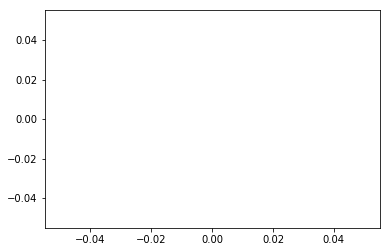

In [29]:
sns.distplot(df_['Toán']);

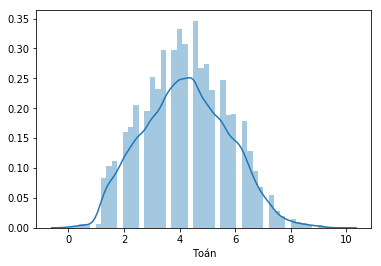

In [31]:
data = df_[~df_['Toán'].isnull()]
sns.distplot(data['Toán']);

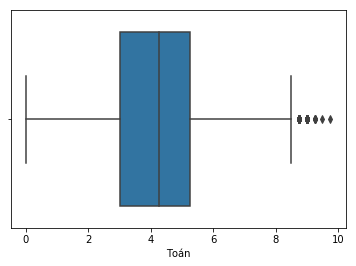

In [32]:
sns.boxplot(data['Toán']);

In [33]:
data['Toán'].describe()

count    34500.000000
mean         4.230152
std          1.534198
min          0.000000
25%          3.000000
50%          4.250000
75%          5.250000
max          9.750000
Name: Toán, dtype: float64

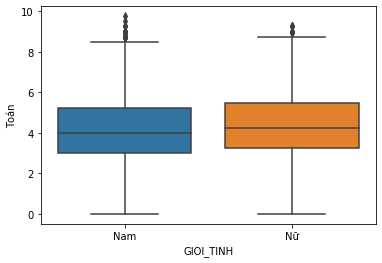

In [67]:
sns.boxplot(data=data, x='GIOI_TINH', y='Toán');

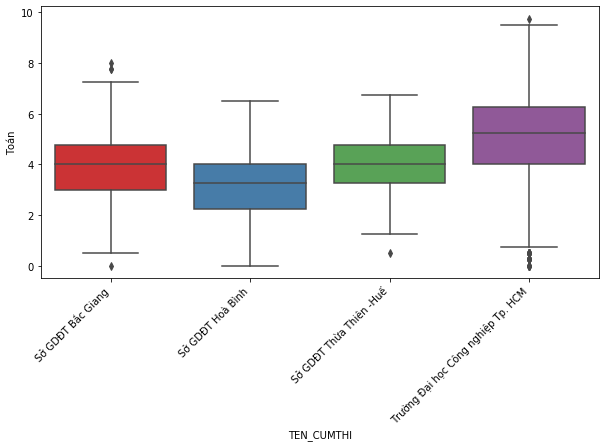

In [72]:
plt.figure(figsize=(10,5))
chart = sns.boxplot(data=data, x='TEN_CUMTHI', y='Toán', palette='Set1');
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right');

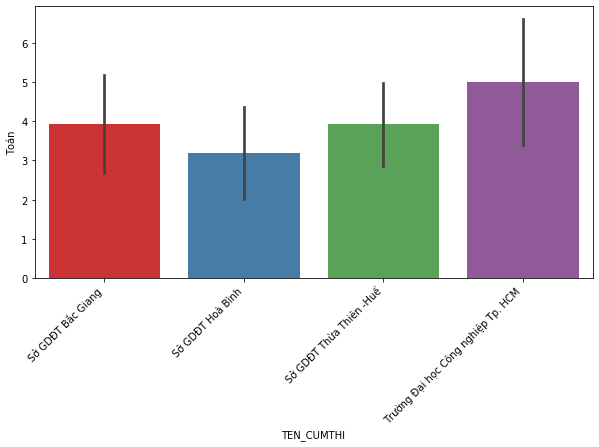

In [74]:
plt.figure(figsize=(10,5))
chart = sns.barplot(data=data, x='TEN_CUMTHI', y='Toán', palette='Set1', ci='sd');
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right');